In [26]:
import pandas as pd
import glob

gasPath = 'datasets\Gas' # use your path
stedin_gas = glob.glob(gasPath + "/stedin_*.csv")
liander_gas = glob.glob(gasPath + "/liander_*.csv")
enexis_gas = glob.glob(gasPath + "/enexis_*.csv") 

li = []

for filename in stedin_gas:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['year'] = filename[-8:].strip('.csv')
    li.append(df)

stedinFrame = pd.concat(li, axis=0, ignore_index=True, sort=False)
print('stedin')
print(stedinFrame.info())
print(stedinFrame.head())

li = []

for filename in liander_gas:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['year'] = filename[-8:].strip('.csv')
    li.append(df)

lianderFrame = pd.concat(li, axis=0, ignore_index=True, sort=False)
print('liander')
print(lianderFrame.info())
print(lianderFrame.head())

li = []

for filename in enexis_gas:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['year'] = filename[-8:].strip('.csv')
    li.append(df)

enexisFrame = pd.concat(li, axis=0, ignore_index=True, sort=False)
print('enexis')
print(enexisFrame.info())
print(enexisFrame.head())


stedin
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934948 entries, 0 to 934947
Data columns (total 15 columns):
net_manager                     934948 non-null int64
purchase_area                   934947 non-null object
street                          934948 non-null object
zipcode_from                    934948 non-null object
zipcode_to                      934948 non-null object
city                            934948 non-null object
num_connections                 934948 non-null int64
delivery_perc                   934948 non-null float64
perc_of_active_connections      934948 non-null float64
type_conn_perc                  934948 non-null float64
type_of_connection              934948 non-null object
annual_consume                  934948 non-null int64
annual_consume_lowtarif_perc    934948 non-null float64
smartmeter_perc                 934948 non-null float64
year                            934948 non-null object
dtypes: float64(5), int64(3), object(7)
memory usage: 1

In [31]:
dataFrame = pd.concat([stedinFrame, lianderFrame, enexisFrame], sort=True)

print(dataFrame.info())
print(dataFrame.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3085757 entries, 0 to 950201
Data columns (total 15 columns):
annual_consume                  float64
annual_consume_lowtarif_perc    float64
city                            object
delivery_perc                   float64
net_manager                     object
num_connections                 float64
perc_of_active_connections      float64
purchase_area                   object
smartmeter_perc                 float64
street                          object
type_conn_perc                  float64
type_of_connection              object
year                            object
zipcode_from                    object
zipcode_to                      object
dtypes: float64(7), object(8)
memory usage: 376.7+ MB
None
   annual_consume  annual_consume_lowtarif_perc          city  delivery_perc  \
0          2611.0                           0.0     AMSTERDAM          100.0   
1          2993.0                           0.0     AMSTERDAM          100.0 

In [33]:
data2009 = dataFrame.loc[dataFrame['year'] == '2009']
print(data2009)

        annual_consume  annual_consume_lowtarif_perc          city  \
0               2611.0                           0.0     AMSTERDAM   
1               2993.0                           0.0     AMSTERDAM   
2               5400.0                           0.0  DUIVENDRECHT   
3               5393.0                           0.0  DUIVENDRECHT   
4               2128.0                           0.0  DUIVENDRECHT   
...                ...                           ...           ...   
100834          1515.0                           0.0   HOUTIGEHAGE   
100835          1919.0                           0.0   HOUTIGEHAGE   
100836          2265.0                           0.0   HOUTIGEHAGE   
100837          3177.0                           0.0   HOUTIGEHAGE   
100838          1841.0                           0.0   HOUTIGEHAGE   

        delivery_perc    net_manager  num_connections  \
0               100.0  8716892700004             26.0   
1               100.0  8716892720002         

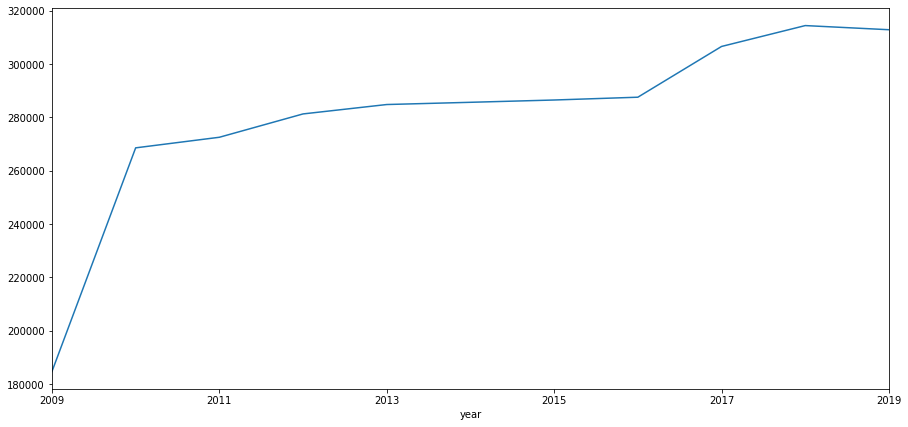

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,7))
annualConsume = dataFrame.groupby('year').count()['annual_consume'].plot(ax=ax)
plt.show()

